In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display, Markdown

In [3]:
employee_data = pd.read_csv("Employee_performance.csv")
display(Markdown("**---First few rows---**"))
print(employee_data.head())

**---First few rows---**

   EmployeeID Department  Gender  Experience  TrainingHours  \
0        1001         IT    Male           4              5   
1        1002  Marketing  Female           0             50   
2        1003      Sales    Male           0              5   
3        1004         HR    Male           1              5   
4        1005         HR  Female           9              5   

   PerformanceRating  Salary  
0               1.00   19000  
1               5.50    6900  
2               1.00    6000  
3               1.00    6000  
4               1.04   38000  


In [4]:
print(employee_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         1468 non-null   int64  
 1   Department         1468 non-null   object 
 2   Gender             1468 non-null   object 
 3   Experience         1468 non-null   int64  
 4   TrainingHours      1468 non-null   int64  
 5   PerformanceRating  1468 non-null   float64
 6   Salary             1468 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 80.4+ KB
None


In [5]:
print(employee_data.shape)

(1468, 7)


In [6]:
print(employee_data.isnull())

      EmployeeID  Department  Gender  Experience  TrainingHours  \
0          False       False   False       False          False   
1          False       False   False       False          False   
2          False       False   False       False          False   
3          False       False   False       False          False   
4          False       False   False       False          False   
...          ...         ...     ...         ...            ...   
1463       False       False   False       False          False   
1464       False       False   False       False          False   
1465       False       False   False       False          False   
1466       False       False   False       False          False   
1467       False       False   False       False          False   

      PerformanceRating  Salary  
0                 False   False  
1                 False   False  
2                 False   False  
3                 False   False  
4                 False  

In [7]:
employee_data.describe()

,EmployeeID,Experience,TrainingHours,PerformanceRating,Salary
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,1734.500000,2.838556,32.144414,3.561512,16107.623297
std,423.919411,2.527657,10.106029,1.044987,12158.438481
min,1001.000000,0.000000,5.000000,1.000000,6000.000000
25%,1367.750000,1.000000,25.000000,2.840000,7700.000000
50%,1734.500000,2.000000,31.000000,3.630000,10100.000000
75%,2101.250000,4.000000,39.000000,4.330000,20000.000000
max,2468.000000,9.000000,50.000000,5.500000,53100.000000


In [8]:
labels = ["Entry-Level","Junior", "Mid-Level", "Senior"]
bins = [0,2,5,8,float('inf')]
employee_data['Experience-Category'] = pd.cut(employee_data['Experience'], bins=bins, labels=labels, right=False)
print(employee_data.info())
print(employee_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   EmployeeID           1468 non-null   int64   
 1   Department           1468 non-null   object  
 2   Gender               1468 non-null   object  
 3   Experience           1468 non-null   int64   
 4   TrainingHours        1468 non-null   int64   
 5   PerformanceRating    1468 non-null   float64 
 6   Salary               1468 non-null   int64   
 7   Experience-Category  1468 non-null   category
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 82.0+ KB
None
   EmployeeID Department  Gender  Experience  TrainingHours  \
0        1001         IT    Male           4              5   
1        1002  Marketing  Female           0             50   
2        1003      Sales    Male           0              5   
3        1004         HR    Male           1       

In [9]:
display(Markdown("**---Missing Values in each column---**"))
print(employee_data.isnull().sum())
display(Markdown("**---Duplicated Rows---**"))
print(employee_data.duplicated())

**---Missing Values in each column---**

EmployeeID             0
Department             0
Gender                 0
Experience             0
TrainingHours          0
PerformanceRating      0
Salary                 0
Experience-Category    0
dtype: int64


**---Duplicated Rows---**

0       False
1       False
2       False
3       False
4       False
        ...  
1463    False
1464    False
1465    False
1466    False
1467    False
Length: 1468, dtype: bool


In [10]:
for col in employee_data.select_dtypes(include=['object','category']).columns:
    print(employee_data[col].value_counts())
    

Department
IT           720
Sales        445
Marketing    240
HR            63
Name: count, dtype: int64
Gender
Male      883
Female    585
Name: count, dtype: int64
Experience-Category
Entry-Level    647
Junior         501
Mid-Level      208
Senior         112
Name: count, dtype: int64


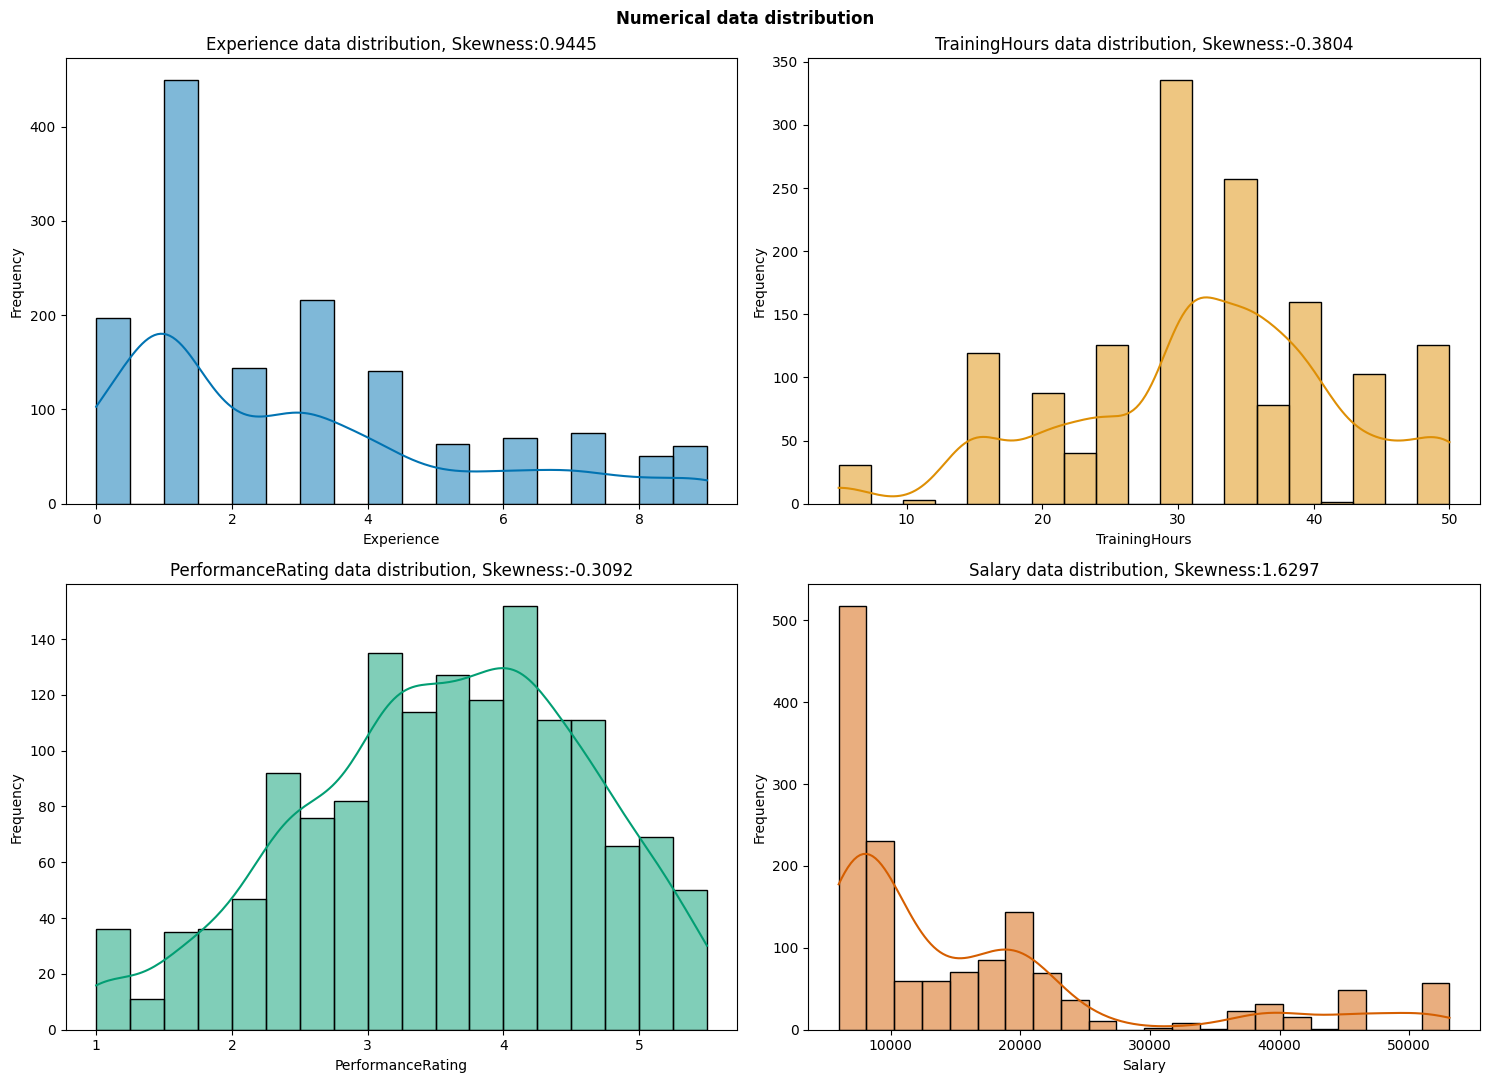

In [11]:
numerical_data = employee_data[['Experience','TrainingHours','PerformanceRating','Salary']].columns.tolist()
fig, axes_array = plt.subplots(2,2,figsize=(15,11))

axes_list = axes_array.flatten()
color_list = sns.color_palette('colorblind',n_colors=len(numerical_data))
for col, ax, color in zip(numerical_data,axes_list,color_list):
    sns.histplot(x=employee_data[col],ax=ax,color=color,kde=True)
    skewness = stats.skew(employee_data[col].values)
    ax.set_title(f"{col} data distribution, Skewness:{skewness:.4f}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    
fig.suptitle("Numerical data distribution", fontweight='bold')
plt.tight_layout()
plt.show()

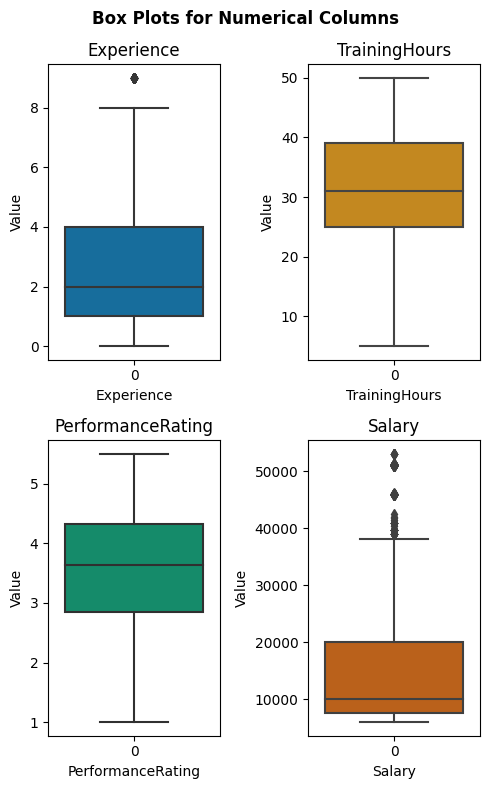

In [25]:
fig, axes_array = plt.subplots(2,2,figsize=(5,8))

axes_list = axes_array.flatten()
color_list = sns.color_palette('colorblind',n_colors=len(numerical_data))
for col, ax, color in zip(numerical_data,axes_list,color_list):
    sns.boxplot(data=employee_data[col],ax=ax,color=color)
    ax.set_title(f"{col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Value")
    
fig.suptitle("Box Plots for Numerical Columns", fontweight='bold')
plt.tight_layout()
plt.show()

In [12]:
#Identifying Outliers Using z-scores method
z_scores = stats.zscore(employee_data[numerical_data].dropna())
outlier_threshold = 3
outliers_z_scores = (z_scores > outlier_threshold) | (z_scores < -outlier_threshold)
print("Number of Outliers Detected using Z Score Method:")
print(outliers_z_scores.sum())

Number of Outliers Detected using Z Score Method:
Experience           0
TrainingHours        0
PerformanceRating    0
Salary               7
dtype: int64


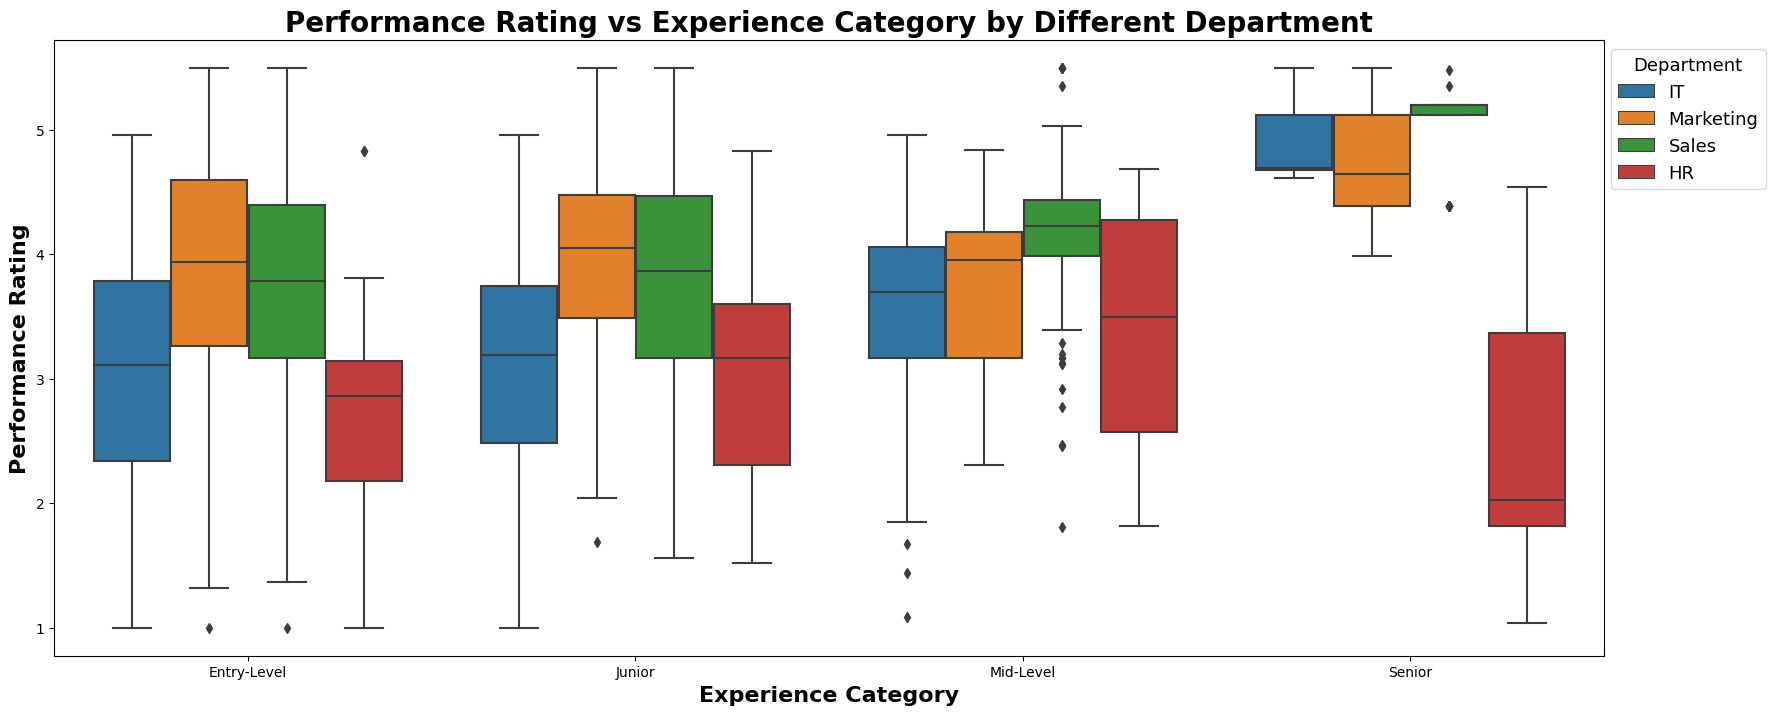

In [17]:
plt.figure(figsize=(20, 8))
sns.boxplot(x=employee_data['Experience-Category'],y=employee_data['PerformanceRating'], hue=employee_data['Department'],)
plt.title('Performance Rating vs Experience Category by Different Department',{'fontsize':20},fontweight='bold')
plt.xlabel('Experience Category',{'fontsize':16},fontweight='bold')
plt.ylabel('Performance Rating',{'fontsize':16},fontweight='bold')
plt.legend(title='Department', loc='upper right', bbox_to_anchor=(1.11,1),title_fontsize=13,fontsize=13)

plt.show()


In [38]:
#Task 2
experience_category = employee_data['Experience-Category'].tolist()

